# 03 - Regression Modeling

## I. Data Extraction

In [1]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from re import sub
from decimal import Decimal
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.style as style 
%matplotlib inline

### 1. Dataset: Player Advanced Statistics

In [2]:
advanced_stat=pd.read_csv('advanced_stat.csv', index_col=0)

In [3]:
advanced_stat.head()

,Name,Age,Tm,WS,G,MP,PER,3PAr,FTr,ORB%,...,USG%,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
0,James Harden,29,HOU,15.2,78,2867,30.6,0.539,0.449,2.5,...,40.5,118,108,11.4,3.8,0.254,10.5,1.1,11.7,9.9
1,Giannis Antetokounmpo,24,MIL,14.4,72,2358,30.9,0.163,0.550,7.3,...,32.3,121,99,8.9,5.5,0.292,5.7,5.0,10.8,7.6
2,Rudy Gobert,26,UTA,14.4,81,2577,24.6,0.000,0.733,13.2,...,17.8,133,100,8.7,5.7,0.268,2.0,5.1,7.0,5.9
3,Damian Lillard,28,POR,12.1,80,2838,23.7,0.419,0.335,2.6,...,29.3,121,112,9.7,2.4,0.205,6.6,-1.1,5.5,5.4
4,Paul George,28,OKC,11.9,77,2841,23.3,0.469,0.335,3.7,...,29.5,116,105,7.0,4.9,0.201,4.7,0.7,5.5,5.3


In [4]:
advanced_stat.shape

(526, 26)

### 2. Dataset: Player Statistics Per Game

In [5]:
player_stat=pd.read_csv('player_stat.csv',index_col=0)
player_stat.head()

,Name,Pos,Age,GS,eFG%,PF,PTS
310,Justin Holiday,SG,29,77,0.490,2.0,10.5
480,Patty Mills,PG,30,1,0.545,1.6,9.9
330,Joe Ingles,PF,31,82,0.565,2.2,12.1
54,DeAndre' Bembry,SG,24,15,0.487,2.3,8.4
674,P.J. Tucker,PF,33,82,0.535,3.1,7.3


In [6]:
player_stat.shape

(530, 7)

In [7]:
player_data=pd.merge(player_stat,advanced_stat, on=['Name','Age'],how='left')
#let's check if we have any missing values
player_data.isnull().sum()

Name     0
Pos      0
Age      0
GS       0
eFG%     0
PF       0
PTS      0
Tm       4
WS       4
G        4
MP       4
PER      4
3PAr     4
FTr      4
ORB%     4
DRB%     4
TRB%     4
AST%     4
STL%     4
BLK%     4
TOV%     4
USG%     4
ORtg     4
DRtg     4
OWS      4
DWS      4
WS/48    4
OBPM     4
DBPM     4
BPM      4
VORP     4
dtype: int64

In [8]:
#let's see where the NA values are located
player_data[player_data['eFG%'].isnull()]

,Name,Pos,Age,GS,eFG%,PF,PTS,Tm,WS,G,...,USG%,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP


In [9]:
#It seems like these four people didn't play in the 2018-2019 season, so we can drop their statistics
player_data=player_data.fillna(0)

### 3. Dataset: Players Salaries

In [10]:
salary=pd.read_csv('salary.csv',index_col=0)
salary.head()

,Name,Team,Salary
1,Stephen Curry,Golden State Warriors,37457154
2,Chris Paul,Houston Rockets,35654150
3,LeBron James,Los Angeles Lakers,35654150
4,Russell Westbrook,Oklahoma City Thunder,35654150
5,Blake Griffin,Detroit Pistons,32088932


In [11]:
salary.shape

(503, 3)

In [12]:
avg_salary=salary.Salary.mean()
avg_salary

6698477.349900597

In [13]:
player_salary=pd.merge(salary,player_data,on='Name',how='outer')
player_salary.shape

(622, 33)

In [14]:
player_salary.isnull().sum()
#93 of the players have no salary values maybe it's not shown in public
#we can either drop them or find average numbers to replace them

Name        0
Team      119
Salary    119
Pos        92
Age        92
GS         92
eFG%       92
PF         92
PTS        92
Tm         92
WS         92
G          92
MP         92
PER        92
3PAr       92
FTr        92
ORB%       92
DRB%       92
TRB%       92
AST%       92
STL%       92
BLK%       92
TOV%       92
USG%       92
ORtg       92
DRtg       92
OWS        92
DWS        92
WS/48      92
OBPM       92
DBPM       92
BPM        92
VORP       92
dtype: int64

In [15]:
player_salary.dropna(inplace=True)

### 4. Dataset: Team Statistics

In [16]:
team_rate=pd.read_csv('team_rate.csv',index_col=0)
team_rate.head()

,Team,W/L%,MOV/A,NRtg/A
0,Milwaukee Bucks,0.732,8.05,7.66
1,Golden State Warriors,0.695,6.42,6.37
2,Toronto Raptors,0.707,5.49,5.38
3,Utah Jazz,0.610,5.29,5.28
4,Houston Rockets,0.646,4.97,5.03


In [17]:
team_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 4 columns):
Team      30 non-null object
W/L%      30 non-null float64
MOV/A     30 non-null float64
NRtg/A    30 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB


## II. Explortory Data Analysis

### Objectives:
1. Which team has the highest total salary?
2. Do the players'salaries affect teams' W/L%?
3. Which position get the higest salary?
4. On average, what is the age group that has the highest salaries?
5. Is a player's salary determined by PTS or effective FG rate?

In [18]:
team_rate_salary=pd.merge(team_rate,salary)
team_rate_salary=team_rate_salary.groupby('Team')['Salary'].sum().to_frame().sort_values('Salary', ascending=False).reset_index()


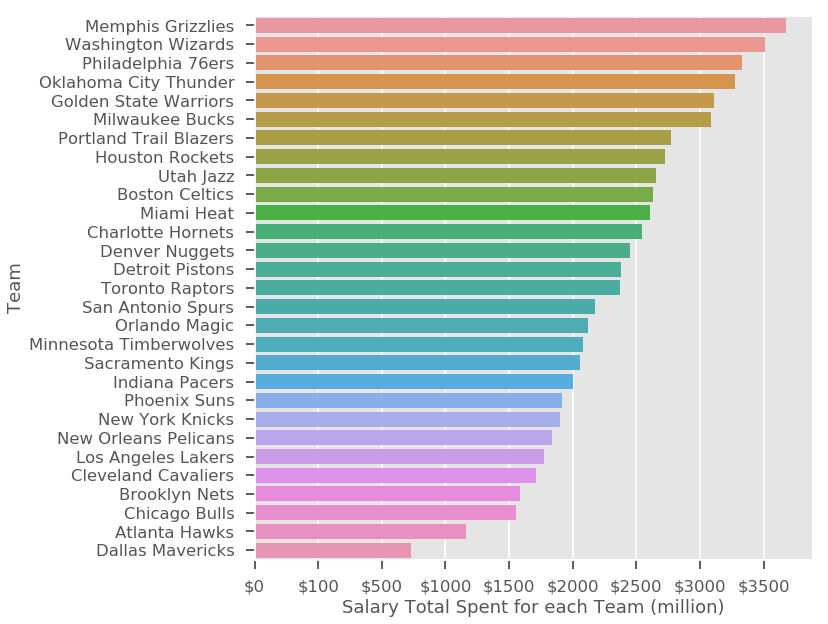

In [2320]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
sns.set_context('talk') 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels(['$0', '$100', '$500', '$1000', '$1500','$2000','$2500','$3000','$3500'])
sns.barplot(x=team_rate_salary.Salary, y=team_rate_salary.Team)
ax.set_xlabel('Salary Total Spent for each Team (million)');
#The total salary for MEM team is over 3.5 billion

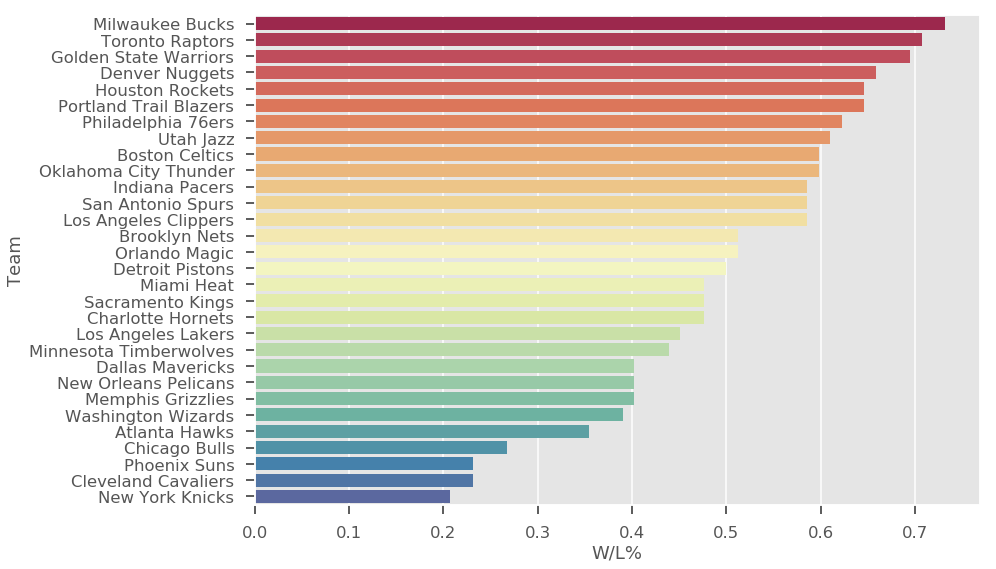

In [2321]:
sns.set_context('talk') 
fig, ax = plt.subplots(figsize=(13,9))
team_rate=team_rate.sort_values('W/L%',ascending=False)
sns.barplot(x=team_rate['W/L%'], y=team_rate['Team'],palette=("Spectral"));

In [49]:
team_rate_salary.head()

,Team,Salary
0,Memphis Grizzlies,167050134
1,Washington Wizards,160582684
2,Philadelphia 76ers,153357133
3,Oklahoma City Thunder,151109192
4,Golden State Warriors,144354753


##### From the graphs above, we can see that only 2/5 of the teams that have high salary spending have the highest W/L %. This indicates that spending more money on salaries do not guarantee team performance.

In [39]:
player_stat.shape

(530, 7)

In [40]:
salary.shape

(503, 3)

In [41]:
player_stat_salary=pd.merge(player_stat,salary,on='Name',how='left')
player_stat_salary.isnull().sum()

Name        0
Pos         0
Age         0
GS          0
eFG%        0
PF          0
PTS         0
Team      119
Salary    119
dtype: int64

In [42]:
player_stat_salary[player_stat_salary['eFG%'].isnull()]

,Name,Pos,Age,GS,eFG%,PF,PTS,Team,Salary


In [43]:
#there are 120 players have missing value in their salaries, we can drop them
player_stat_salary.dropna(inplace=True)

In [44]:
player_stat_salary.shape

(411, 9)

In [45]:
player_stat_salary.groupby(['Pos'])['Salary'].sum().to_frame().sort_values('Salary',ascending=False).reset_index()

,Pos,Salary
0,PG,644588244.0
1,SG,603283426.0
2,C,602029483.0
3,PF,544617566.0
4,SF,433733322.0
5,PF-SF,36907820.0
6,SF-SG,20958525.0
7,SG-PF,7560000.0
8,SG-SF,6000000.0
9,PF-C,5450000.0


##### From this table, we can see that players who play point guards and shooting guards positions tend to have higher salaries. However, we need to also check if one player plays multiple positions.

In [2357]:
player_stat_salary.groupby('Age')['Salary'].mean().to_frame().sort_values('Salary',ascending=False).reset_index().head()

,Age,Salary
0,30,1.359008e+07
1,28,1.134353e+07
2,29,1.130398e+07
3,33,1.130277e+07
4,32,1.029464e+07


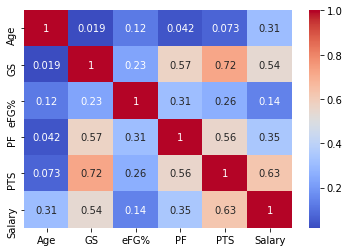

In [53]:
sns.heatmap(player_stat_salary.corr(),cmap='coolwarm',annot=True)
#from this result, we can see people who get higher points are more likely to start games 

## III. Feature Selection

In [54]:
player_salary.shape

(411, 33)

In [55]:
#drop all non-numeric data
#use Variance Inflation Factor (VIF) Explained to 
player_salary_num=player_salary._get_numeric_data()
player_salary_num.columns

Index(['Salary', 'Age', 'GS', 'eFG%', 'PF', 'PTS', 'WS', 'G', 'MP', 'PER',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP'],
      dtype='object')

In [56]:
#remove the punctuation in the column names 
player_salary_num.columns=player_salary_num.columns.str.replace('[^\w\s]','')

In [57]:
#rename column name
player_salary_num=player_salary_num.rename({'3PAr': 'PAR','FTr':'FTR'}, axis=1) 
player_salary_num.columns

Index(['Salary', 'Age', 'GS', 'eFG', 'PF', 'PTS', 'WS', 'G', 'MP', 'PER',
       'PAR', 'FTR', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'USG',
       'ORtg', 'DRtg', 'OWS', 'DWS', 'WS48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

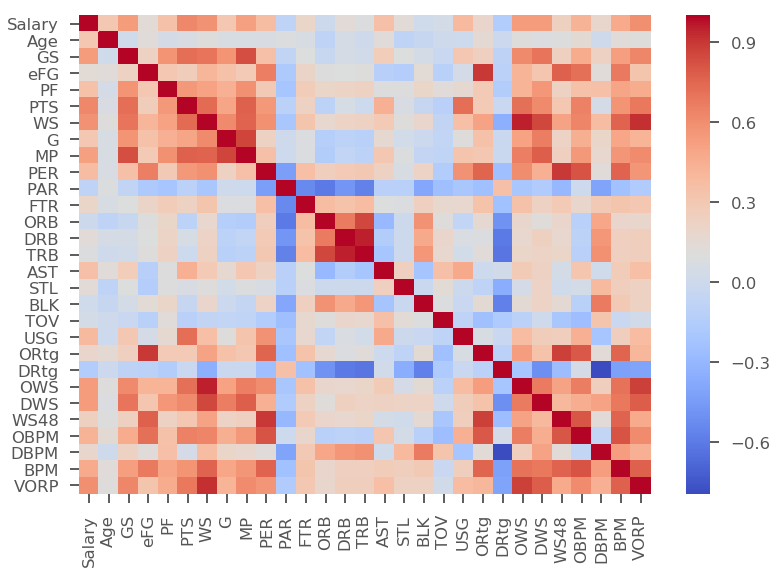

In [2349]:
sns.heatmap(player_salary_num.corr(),cmap='coolwarm')
#we can see that a lot of features are highly correlated

In [67]:
# get y and X dataframes based on this regression:
from patsy import dmatrices
y, X = dmatrices('Salary ~ Age+GS+eFG+PF+PTS+WS+G+MP+PER+PAR+FTR+ORB+DRB+TRB+AST+STL+BLK+TOV+USG+ORtg+DRtg+OWS+DWS+WS48+OBPM+DBPM+BPM+VORP',
                 player_salary_num, return_type='dataframe')


A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

In [2361]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [2362]:
vif.round(1)

,VIF Factor,features
0,25770.9,Intercept
1,1.1,Age
2,5.2,GS
3,17.1,eFG
4,4.1,PF
5,22.4,PTS
6,3610.5,WS
7,12.1,G
8,29.7,MP
9,190.4,PER


In [70]:
#after checking the multicollinearity, drop the features that have high collinears 
nba_data=player_salary_num.drop(['WS','ORB','DRB','OWS','DWS','OBPM','DBPM'],axis=1)

In [62]:
nba_data.head()

,Salary,Age,GS,eFG,PF,PTS,G,MP,PER,PAR,...,AST,STL,BLK,TOV,USG,ORtg,DRtg,WS48,BPM,VORP
0,37457154.0,30.0,69.0,0.604,2.4,27.3,69.0,2331.0,24.4,0.604,...,24.2,1.9,0.9,11.6,30.4,120.0,110.0,0.199,6.3,4.9
1,35654150.0,33.0,58.0,0.508,2.5,15.6,58.0,1857.0,19.7,0.493,...,39.3,3.0,0.8,15.8,22.5,118.0,109.0,0.172,3.0,2.4
2,35654150.0,34.0,55.0,0.560,1.7,27.4,55.0,1937.0,25.6,0.299,...,39.4,1.7,1.4,13.3,31.6,114.0,108.0,0.179,8.1,4.9
3,35654150.0,30.0,73.0,0.468,3.4,22.9,73.0,2630.0,21.1,0.279,...,46.5,2.5,1.1,16.3,30.9,105.0,103.0,0.124,6.5,5.6
4,32088932.0,29.0,75.0,0.532,2.7,24.5,75.0,2622.0,21.0,0.389,...,27.1,1.0,0.9,13.8,30.2,113.0,110.0,0.147,4.6,4.4


In [72]:
nba_data.columns

Index(['Salary', 'Age', 'GS', 'eFG', 'PF', 'PTS', 'G', 'MP', 'PER', 'PAR',
       'FTR', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'USG', 'ORtg', 'DRtg', 'WS48',
       'BPM', 'VORP'],
      dtype='object')

In [73]:
nba_data.shape

(411, 22)

In [74]:
nba_data_feature=nba_data.loc[:,['Salary','Age','PTS','MP','PER','VORP','BPM','WS48','TOV','STL']]

In [75]:
nba_data_feature.shape

(411, 10)

Let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

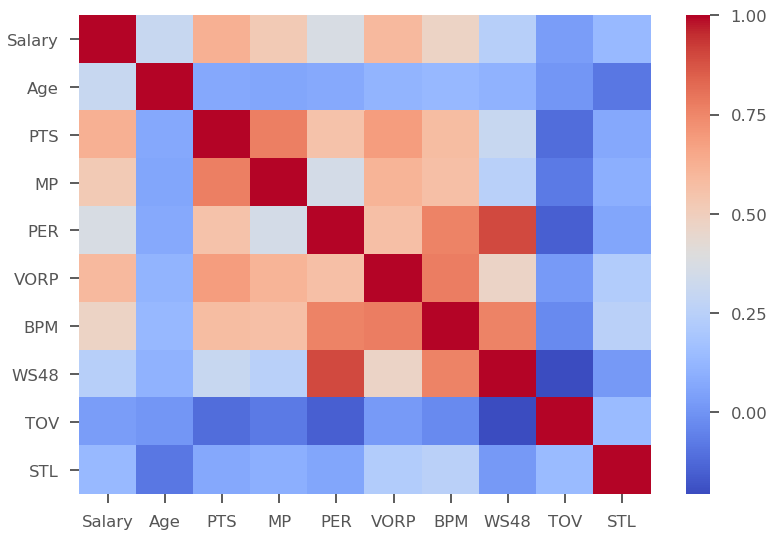

In [2304]:
sns.heatmap(nba_data_feature.corr(),cmap='coolwarm');

In [76]:
nba_data_feature.columns

Index(['Salary', 'Age', 'PTS', 'MP', 'PER', 'VORP', 'BPM', 'WS48', 'TOV',
       'STL'],
      dtype='object')

    **PTS**: points
    **MP**: minutes played
    **PER**: player efficiency rating
    **VORP**:value over replacement player
    **BPM**: box plus/min-->evaluate player's quality and contribution to the team.
    **WS48**: the number of wins a player produces for his team in 48 mins
    **TOV**: turnover per game-->when a team loses possession of the ball to the opposing team before a player takes a shot at their team's basket.
    **STL**: steal per game

## IV. Regression Model Building

Goal:

1. K_Fold to get test and train cross validation
2. Run Linear Regression, Lasso Regression, Ridge Regression and compare results
3. Choose the best model that has the lowest MAE and highest R^2
4. Coefficient interpretation based on the best model 

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization

In [2363]:
#basic X,y
X, y = nba_data.drop('Salary',axis=1), nba_data['Salary']

In [65]:
nba_data.columns

Index(['Salary', 'Age', 'GS', 'eFG', 'PF', 'PTS', 'G', 'MP', 'PER', 'PAR',
       'FTR', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'USG', 'ORtg', 'DRtg', 'WS48',
       'BPM', 'VORP'],
      dtype='object')

In [2032]:
#X, y version 2
nba_data_1=nba_data_c.loc[:,['Salary','Age','PF','PTS','VORP']]

In [2033]:
#X, y version 2
X1, y1 = nba_data_1.drop('Salary',axis=1), nba_data_1['Salary']

In [2305]:
#X, y version 3
X2, y2 = nba_data_feature.drop('Salary',axis=1), nba_data_feature['Salary']

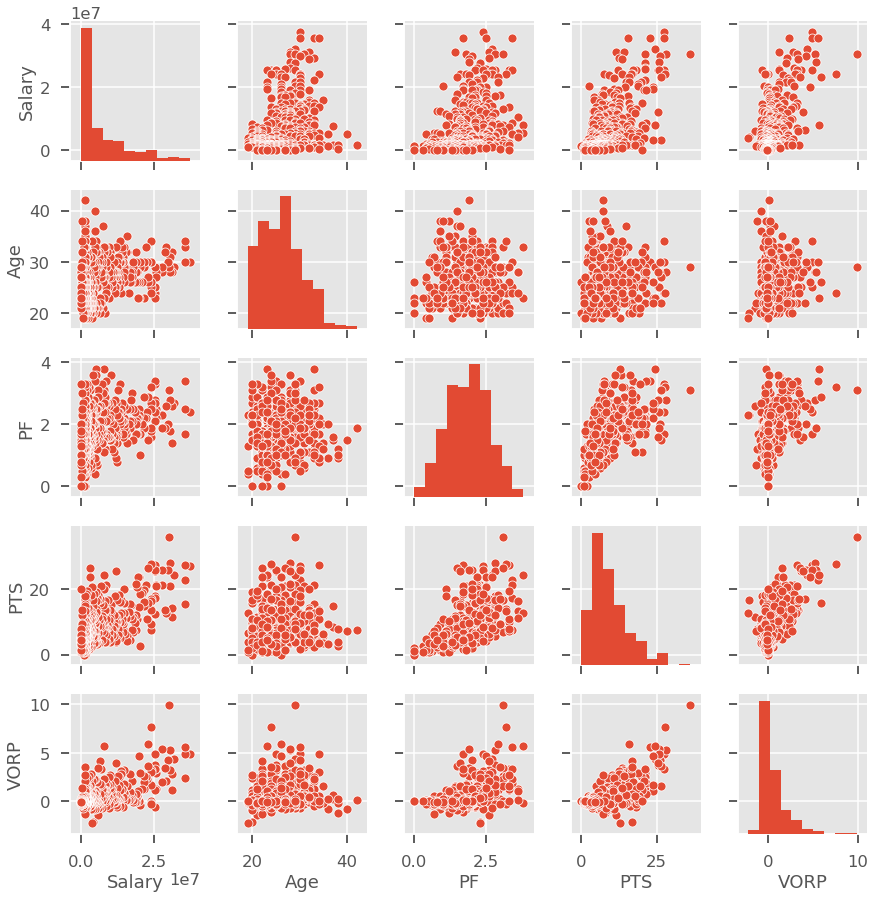

In [2034]:
sns.pairplot(nba_data_1);

## OLS with Train and Test

In [2250]:
#basic X,y
X, y = nba_data.drop('Salary',axis=1), nba_data['Salary']

In [2251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [2234]:
ols_fit = sm.OLS(y_train, X_train)
fit = ols_fit.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     33.89
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           2.02e-61
Time:                        14:59:00   Log-Likelihood:                -4627.6
No. Observations:                 274   AIC:                             9297.
Df Residuals:                     253   BIC:                             9373.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         5.071e+05    8.3e+04      6.109      0.000    3.44e+05    6.71e+05
GS           3.22e+04   2.55e+04      1.264      0.207    -1.8e+04    8.24e+04
eFG        -2.231e+07   1.47e+07     -1.519      0.130   -5.12e+07    6.62e+06
PF         -1.798e+06   7.54e+05     -2.387      0.018   -3.28e+06   -3.15e+05
PTS          7.08e+05   2.55e+05      2.773      0.006    2.05e+05    1.21e+06
G          -8.154e+04   4.76e+04     -1.713      0.088   -1.75e+05    1.22e+04
MP          1976.3954   2191.608      0.902      0.368   -2339.724    6292.515
PER        -3.405e+05   4.31e+05     -0.790      0.430   -1.19e+06    5.08e+05
PAR        -2.185e+06   2.73e+06     -0.799      0.425   -7.57e+06     3.2e+06
FTR        -3.554e+06   3.96e+06     -0.897      0.371   -1.14e+07    4.25e+06
TRB         1.495e+05   1.38e+05      1.081      0.281   -1.23e+05    4.22e+05
AST        -1.229e+05   9.21e+04     -1.333      0.184   -3.04e+05    5.86e+04
STL         5.453e+05   7.04e+05      0.775      0.439   -8.41e+05    1.93e+06
BLK        -5.377e+05   3.33e+05     -1.616      0.107   -1.19e+06    1.18e+05
TOV         2.579e+05   1.54e+05      1.670      0.096   -4.62e+04    5.62e+05
USG         6.278e+04   2.01e+05      0.312      0.756   -3.34e+05    4.59e+05
ORtg        3.385e+04   1.44e+05      0.235      0.814    -2.5e+05    3.17e+05
DRtg        5365.8701   1.06e+05      0.050      0.960   -2.04e+05    2.15e+05
WS48         1.71e+07   2.58e+07      0.663      0.508   -3.37e+07    6.79e+07
BPM         6.446e+05   3.99e+05      1.617      0.107    -1.4e+05    1.43e+06
VORP        5.103e+05   5.93e+05      0.861      0.390   -6.57e+05    1.68e+06
==============================================================================
Omnibus:                       14.492   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.934
Skew:                           0.495   Prob(JB):                     0.000347
Kurtosis:                       3.644   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2196]:
ols_y_pred=fit.predict(X_test)
ols_y_train_pred=fit.predict(X_train)

In [2300]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4395952.370541334

In [2162]:
RMSE = sqrt(mean_squared_error(y_test, ols_y_pred))
RMSE

3842292.0416630856

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
ols_fit = sm.OLS(y_train, X_train)
fit = ols_fit.fit()
fit.summary()

In [ ]:
ols_y_pred=fit.predict(X_test)
ols_y_train_pred=fit.predict(X_train)

In [ ]:
RMSE = sqrt(mean_squared_error(y_train, ols_y_train_pred))
RMSE

In [ ]:
RMSE = sqrt(mean_squared_error(y_test, ols_y_pred))
RMSE

## OLS (Feature Selection) with Train and Test

Based on the above result, I would like to only keep the features that have low p value
which indicate that they are significant to the model. 

By dropping other features that are relatively insignificant for the model building,I would like to see if there will be any improvement on the r square score and RMSE 

In [2258]:
#X, y version 2
nba_data_1=nba_data.loc[:,['Salary','Age','PF','PTS']]

In [2259]:
#X,y feature seletion
X1, y1 = nba_data_1.drop('Salary',axis=1), nba_data_1['Salary']

In [2260]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [2261]:
ols_fit1 = sm.OLS(y1_train, X1_train)
fit1 = ols_fit1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     162.5
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           2.80e-60
Time:                        16:10:55   Log-Likelihood:                -4670.0
No. Observations:                 274   AIC:                             9346.
Df Residuals:                     271   BIC:                             9357.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         5.839e+04   3.66e+04      1.594      0.112   -1.37e+04    1.31e+05
PF         -1.166e+06    5.8e+05     -2.010      0.045   -2.31e+06   -2.37e+04
PTS         8.443e+05   7.94e+04     10.628      0.000    6.88e+05       1e+06
==============================================================================
Omnibus:                       52.292   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.491
Skew:                           1.087   Prob(JB):                     4.50e-19
Kurtosis:                       4.634   Cond. No.                         44.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2262]:
ols_y_pred1=fit1.predict(X1_test)

In [2263]:
RMSE1 = sqrt(mean_squared_error(y1_test, ols_y_pred1))
RMSE1

6746188.192217052

In [2301]:
mean_absolute_error(y1_test, ols_y_pred1)

5099180.9475350715

From the result from the OLS with selected features, it turns out that dropping those features will cause high RMSE. The RMSE from the previous OLS model gives us 3842292.0416630856. 

Let's see if we use k fold cross validation can improve the model.

## K Fold Cross Validation

In [2227]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=71)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [2228]:
lm = LinearRegression()

In [2229]:
#metric: r2
kf = KFold(n_splits=10, shuffle=True, random_state = 1000)
print(np.mean(cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2')))

-2.973732513374393


In [2264]:
#metric: RMSE
kf = KFold(n_splits=10, shuffle=True, random_state = 1000)
print(np.mean(np.abs(cross_val_score(lm, X, y, cv=kf, scoring='neg_mean_squared_error'))**.5))

5829872.363818727


In [2265]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2267]:
y_pred = lm.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

35052200685982.035

# Conclusion:

After comparing different models based on r^2 scores and MAE, OLS gives me the best result. 